<a href="https://colab.research.google.com/github/CH0900/114-1Business-Intelligence/blob/main/0917_week2_5113029043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>ÂèñÂæóËÇ°ÂÉπË≥áÊñô</b>

## ‰ΩøÁî® Yahoo Finance ÂèñÂæóË≥áÊñô

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf # yahoo finance Â•ó‰ª∂
import pandas as pd # ÁµêÊßãÂåñË≥áÊñôËôïÁêÜÂ•ó‰ª∂
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂

In [3]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "2344.tw"
# stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''‰ªäÂ§©ÂæÄÂâçÁÆóÂπæÂ§©'''
# Ë≥áÊñôÁµêÊùüÊôÇÈñì
end = dt.date.today()
# ÊäìÂèñÂçäÂπ¥Ë≥áÊñôÔºàÁèæÂú®-ÈÅéÂéª180Â§©Ôºâ
start = end - dt.timedelta(days=360)

'''ÊäìÂèñÁâπÂÆöÊôÇÈñì'''
# start = dt.datetime(2024, 1, 1)  # ÊåáÂÆöÁöÑÈñãÂßãÊó•Êúü
# end = dt.datetime(2024, 6, 30)    # ÊåáÂÆöÁöÑÁµêÊùüÊó•Êúü


# ÂèÉÊï∏1: ËÇ°Á•®‰ª£Ëôü, ÂèÉÊï∏2: ÈñãÂßãÊôÇÈñì, ÂèÉÊï∏3: ÁµêÊùüÊôÇÈñì
df = yf.download(stock_id, start=start, end=end).reset_index()

# Âà™Èô§ Ticker Ê¨Ñ‰Ωç‰∏¶Âèñ‰ª£
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-4063770710.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price       Date      Close       High        Low       Open     Volume
0     2024-09-27  21.450001  21.549999  21.250000  21.299999   36180032
1     2024-09-30  21.350000  21.750000  21.150000  21.200001   31334603
2     2024-10-01  21.000000  21.450001  20.900000  21.350000   20181820
3     2024-10-04  20.850000  21.250000  20.700001  21.000000   17727492
4     2024-10-07  20.700001  21.000000  20.549999  20.950001   14585573
..           ...        ...        ...        ...        ...        ...
233   2025-09-15  26.799999  27.100000  25.700001  26.950001  467481131
234   2025-09-16  27.950001  28.900000  25.750000  26.500000  639359881
235   2025-09-17  29.400000  29.799999  27.299999  28.100000  442590512
236   2025-09-18  32.299999  32.299999  30.250000  30.250000  445214363
237   2025-09-19  33.500000  34.299999  32.500000  34.000000  580346156

[238 rows x 6 columns]

# <b>1. ÊäÄË°ìÊåáÊ®ôÁöÑË®àÁÆó</b>
ÁßªÂãïÂãïÂπ≥ÂùáÁ∑öÔºàMAÔºâ„ÄÅÁõ∏Â∞çÂº∑Âº±ÊåáÊï∏ÔºàRSIÔºâ„ÄÅÂπ≥ÊªëÁï∞ÂêåÁßªÂãïÂπ≥ÂùáÁ∑öÔºàMACDÔºâ


## 1.1 Ë®àÁÆóÁ∞°ÂñÆÁßªÂãïÂπ≥ÂùáÁ∑öÔºàSMAÔºâ

In [4]:
# Ë®àÁÆó8Êó• SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# Ë®àÁÆó13Êó• SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# Ë®àÁÆó20Êó• SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()
df['40_SMA'] = df['Close'].rolling(window=40).mean()
df['60_SMA'] = df['Close'].rolling(window=60).mean()

# ÂàóÂç∞ÊúÄÂæåÁ≠ÜÊï∏
df.tail()

Price       Date      Close       High        Low       Open     Volume  \
233   2025-09-15  26.799999  27.100000  25.700001  26.950001  467481131   
234   2025-09-16  27.950001  28.900000  25.750000  26.500000  639359881   
235   2025-09-17  29.400000  29.799999  27.299999  28.100000  442590512   
236   2025-09-18  32.299999  32.299999  30.250000  30.250000  445214363   
237   2025-09-19  33.500000  34.299999  32.500000  34.000000  580346156   

Price     8_SMA     13_SMA   20_SMA    40_SMA     60_SMA  
233    24.30000  22.619231  21.2100  19.41625  19.337500  
234    25.23125  23.261539  21.6775  19.68000  19.476667  
235    26.08750  24.007692  22.2475  19.98625  19.632500  
236    27.05000  24.930769  22.9425  20.35375  19.833333  
237    28.16875  25.973077  23.7075  20.75750  20.044167

## 1.2 Ë®àÁÆóÁõ∏Â∞çÂº∑Âº±ÊåáÊï∏ÔºàRSIÔºâ

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [5]:
# Ë®àÁÆóÊØèÂÄã‰∫§ÊòìÊó•ÁöÑÂÉπÊ†ºËÆäÂãïÔºåÂç≥Áï∂Â§©Êî∂Áõ§ÂÉπËàáÂâç‰∏ÄÂ§©Êî∂Áõ§ÂÉπÁöÑÂ∑ÆÁï∞
df['Change'] = df['Close'] - df['Close'].shift(1)

# Â∞áËÆäÂãïÂÄº‰∏≠ÁöÑÊ≠£Êï∏ÈÉ®ÂàÜË¶ñÁÇ∫‚ÄúGain‚ÄùÔºàÂ¢ûÁõäÔºâÔºåÂ¶ÇÊûúËÆäÂãïÁÇ∫Ë≤†ÂâáË®òÁÇ∫0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# Â∞áËÆäÂãïÂÄº‰∏≠ÁöÑË≤†Êï∏ÈÉ®ÂàÜË¶ñÁÇ∫‚ÄúLoss‚ÄùÔºàÊêçÂ§±ÔºâÔºåÂèñÂÖ∂ÁµïÂ∞çÂÄºÔºåÂ¶ÇÊûúËÆäÂãïÁÇ∫Ê≠£ÂâáË®òÁÇ∫0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# Ë®àÁÆóÈÅéÂéª14ÂÄã‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÂ¢ûÁõä
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# Ë®àÁÆóÈÅéÂéª14ÂÄã‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊêçÂ§±
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# Ë®àÁÆóÁõ∏Â∞çÂº∑Âº±ÊåáÊï∏ÁöÑÁõ∏Â∞çÂº∑Â∫¶ÔºàRSÔºâÔºåÂç≥Âπ≥ÂùáÂ¢ûÁõäËàáÂπ≥ÂùáÊêçÂ§±ÁöÑÊØîÂÄº
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# Ë®àÁÆóÁõ∏Â∞çÂº∑Âº±ÊåáÊï∏ÔºàRSIÔºâÔºå‰ΩøÁî®RSÂÖ¨ÂºèË®àÁÆóÂá∫‰æÜ
df['RSI'] = 100 - (100 / (1 + df['RS']))

# È°ØÁ§∫ÊúÄÂæåÂπæË°åÁöÑÊï∏Êìö
# df.tail()
# print(df)
df

Price       Date      Close       High        Low       Open     Volume  \
0     2024-09-27  21.450001  21.549999  21.250000  21.299999   36180032   
1     2024-09-30  21.350000  21.750000  21.150000  21.200001   31334603   
2     2024-10-01  21.000000  21.450001  20.900000  21.350000   20181820   
3     2024-10-04  20.850000  21.250000  20.700001  21.000000   17727492   
4     2024-10-07  20.700001  21.000000  20.549999  20.950001   14585573   
..           ...        ...        ...        ...        ...        ...   
233   2025-09-15  26.799999  27.100000  25.700001  26.950001  467481131   
234   2025-09-16  27.950001  28.900000  25.750000  26.500000  639359881   
235   2025-09-17  29.400000  29.799999  27.299999  28.100000  442590512   
236   2025-09-18  32.299999  32.299999  30.250000  30.250000  445214363   
237   2025-09-19  33.500000  34.299999  32.500000  34.000000  580346156   

Price     8_SMA     13_SMA   20_SMA    40_SMA     60_SMA    Change      Gain  \
0           NaN        NaN      NaN       NaN        NaN       NaN  0.000000   
1           NaN        NaN      NaN       NaN        NaN -0.100000  0.000000   
2           NaN        NaN      NaN       NaN        NaN -0.350000  0.000000   
3           NaN        NaN      NaN       NaN        NaN -0.150000  0.000000   
4           NaN        NaN      NaN       NaN        NaN -0.150000  0.000000   
..          ...        ...      ...       ...        ...       ...       ...   
233    24.30000  22.619231  21.2100  19.41625  19.337500  1.349998  1.349998   
234    25.23125  23.261539  21.6775  19.68000  19.476667  1.150002  1.150002   
235    26.08750  24.007692  22.2475  19.98625  19.632500  1.449999  1.449999   
236    27.05000  24.930769  22.9425  20.35375  19.833333  2.900000  2.900000   
237    28.16875  25.973077  23.7075  20.75750  20.044167  1.200001  1.200001   

Price  Loss  Avg Gain  Avg Loss         RS        RSI  
0      0.00       NaN       NaN        NaN        NaN  
1      0.10       NaN       NaN        NaN        NaN  
2      0.35       NaN       NaN        NaN        NaN  
3      0.15       NaN       NaN        NaN        NaN  
4      0.15       NaN       NaN        NaN        NaN  
..      ...       ...       ...        ...        ...  
233    0.00  0.617857  0.042857  14.416700  93.513527  
234    0.00  0.625000  0.042857  14.583370  93.582903  
235    0.00  0.728571  0.028571  25.500021  96.226418  
236    0.00  0.928571  0.028571  32.500026  97.014928  
237    0.00  0.971429  0.028571  34.000033  97.142860  

[238 rows x 18 columns]

## 1.3 Ë®àÁÆóÂπ≥ÊªëÁï∞ÂêåÁßªÂãïÂπ≥ÂùáÁ∑öÔºàMACDÔºâ

In [6]:
'''
Á¨¨‰∏ÄÊó•
# Âπ≥Êªë‰øÇÊï∏ÂÖ¨ÂºèÔºö Œ± = 2 / (span + 1) = 2 / (span + 1)
# Œ± = 2 / (8 + 1) = 2 / (8 + 1) ‚âà 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# Ë®àÁÆó8Â§©ÁöÑÊåáÊï∏ÁßªÂãïÂπ≥ÂùáÁ∑öÔºàEMAÔºâÔºå‰∏¶Â∞áÂÖ∂Â≠òÂÑ≤Âú® 'EMA_8' Âàó‰∏≠
# adjust=False Ë°®Á§∫Âú®Ë®àÁÆó EMA ÊôÇÔºåÂè™ËÄÉÊÖÆÁï∂ÂâçÂÄºÂíåÂâç‰∏ÄÂÄã EMA ÁöÑÈÅûÊ≠∏Ë®àÁÆóÊñπÂºèÔºåËÄå‰∏çËÄÉÊÖÆÊâÄÊúâÊ≠∑Âè≤Êï∏Êìö
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# Ë®àÁÆó13Â§©ÁöÑÊåáÊï∏ÁßªÂãïÂπ≥ÂùáÁ∑öÔºàEMAÔºâÔºå‰∏¶Â∞áÂÖ∂Â≠òÂÑ≤Âú® 'EMA_13' Âàó‰∏≠
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# Ë®àÁÆóMACDÁ∑öÔºö8Â§©EMAÊ∏õÂéª13Â§©EMAÔºå‰∏¶Â∞áÂÖ∂Â≠òÂÑ≤Âú® 'MACD' Âàó‰∏≠
df['MACD'] = df['EMA_8'] - df['EMA_13']

# È°ØÁ§∫DataFrameÁöÑÊúÄÂæåÂπæË°åÊï∏Êìö
df.head(3)

Price       Date      Close       High    Low       Open    Volume  8_SMA  \
0     2024-09-27  21.450001  21.549999  21.25  21.299999  36180032    NaN   
1     2024-09-30  21.350000  21.750000  21.15  21.200001  31334603    NaN   
2     2024-10-01  21.000000  21.450001  20.90  21.350000  20181820    NaN   

Price  13_SMA  20_SMA  40_SMA  ...  Change  Gain  Loss  Avg Gain  Avg Loss  \
0         NaN     NaN     NaN  ...     NaN   0.0  0.00       NaN       NaN   
1         NaN     NaN     NaN  ...   -0.10   0.0  0.10       NaN       NaN   
2         NaN     NaN     NaN  ...   -0.35   0.0  0.35       NaN       NaN   

Price  RS  RSI      EMA_8     EMA_13      MACD  
0     NaN  NaN  21.450001  21.450001  0.000000  
1     NaN  NaN  21.427778  21.435715 -0.007937  
2     NaN  NaN  21.332717  21.373470 -0.040753  

[3 rows x 21 columns]

# <b>2. Ë≥áÊñôÂèØË¶ñÂåñ</b>
K Á∑öÂûãÊÖãÁöÑÊçïÊçâ

## 2.1 ÂèØË¶ñÂåñÊî∂Áõ§ÂÉπÊäòÁ∑öÂúñ

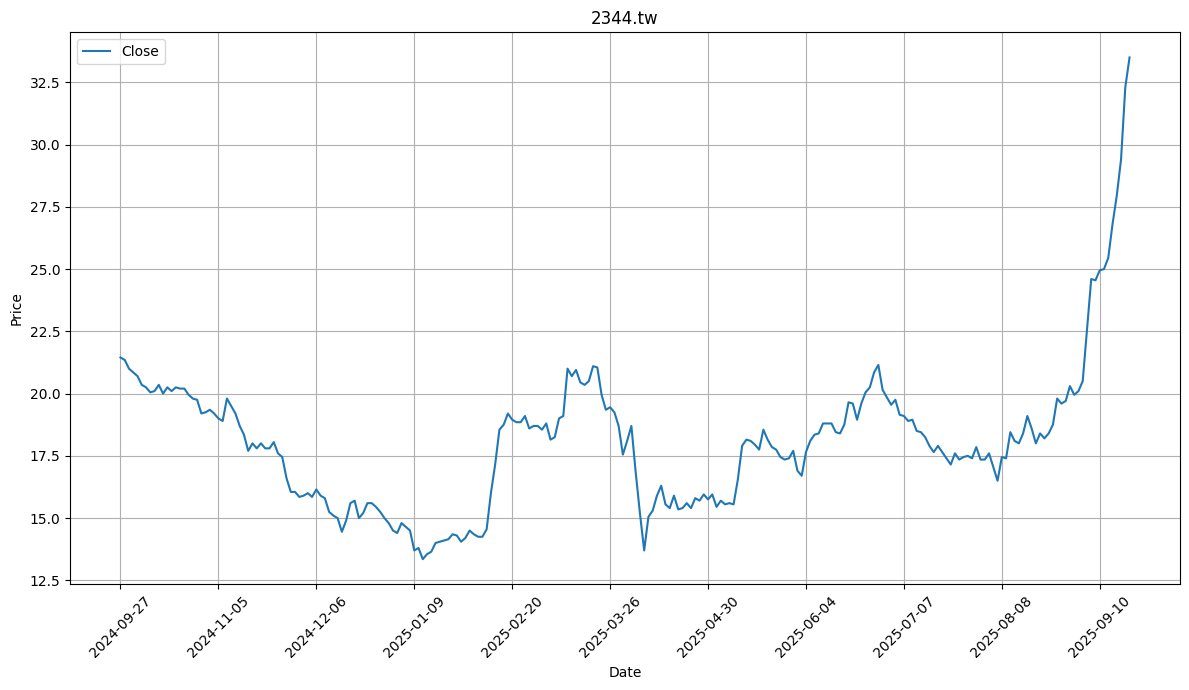

In [7]:
import matplotlib.pyplot as plt

# Áï´Â∏ÉÂ∞∫ÂØ∏Â§ßÂ∞èË®≠ÂÆö
plt.figure(figsize=(12, 7))

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑË≥áÊñôÊ¨Ñ‰Ωç
plt.plot(df['Close'], label='Close')

# Ë®≠ÂÆö x Ëª∏ÁöÑÊôÇÈñì
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # Ë®≠ÂÆöÂú® x Ëª∏‰∏äÈ°ØÁ§∫Ê®ôÁ±§ÁöÑ‰ΩçÁΩÆÔºàÁ¥¢ÂºïÔºâÔºåÈÄô‰∫õ‰ΩçÁΩÆÈñìÈöîÁÇ∫ len(date)//num
           date[::len(date)//num],  # Ë®≠ÂÆöÈ°ØÁ§∫Âú® x Ëª∏‰∏äÁöÑÊó•ÊúüÊ®ôÁ±§ÔºåÊï∏ÈáèÁÇ∫ numÔºåÈñìÈöîÁÇ∫ len(date)//num
           rotation = 45) # ËÆìÊó•ÊúüÊ®ôÁ±§ÊóãËΩâ 45 Â∫¶Ôºå‰ª•ÈÅøÂÖçÊ®ôÁ±§‰πãÈñìÈáçÁñäÔºåÊèêÈ´òÂèØËÆÄÊÄß

# Ë®≠ÂÆöÂúñË°®ÁöÑÊ®ôÈ°åÔºåx Ëª∏Âíå y Ëª∏ÁöÑÊ®ôÁ±§
plt.title(f'{stock_id}')   # Â∞áËÇ°Á•®‰ª£ËôüË®≠ÁÇ∫ÂúñÊ®ô
plt.xlabel('Date')         # x Ëª∏Ê®ôÁ±§
plt.ylabel('Price')  # y Ëª∏Ê®ôÁ±§
plt.legend(loc='upper left') # Âú®Â∑¶‰∏äËßíÈ°ØÁ§∫Âúñ‰æã
plt.grid(True) # Âú®Âúñ‰∏äÈ°ØÁ§∫Á∂≤Ê†º
plt.tight_layout()  # Ëá™ÂãïË™øÊï¥ÂúñË°®‰∏≠ÁöÑÈñìË∑ùÔºåÈÅøÂÖçÂÖÉÁ¥†‰πãÈñìÁöÑÈáçÁñä

# È°ØÁ§∫ÂúñË°®
plt.show()

## 2.2 Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

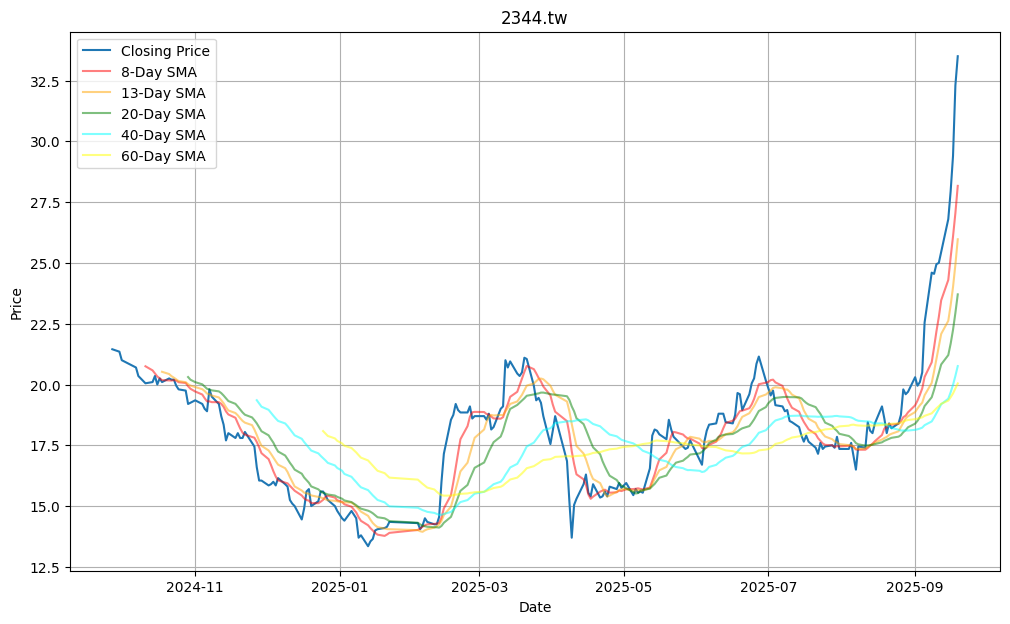

In [8]:
# Áï´Â∏ÉÂ∞∫ÂØ∏Â§ßÂ∞èË®≠ÂÆö
plt.figure(figsize=(12, 7))

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑË≥áÊñôÊ¨Ñ‰Ωç
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 Â§©ÁöÑ SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 Â§©ÁöÑ SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 Â§©ÁöÑ SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)
plt.plot(df['Date'], df['40_SMA'], label='40-Day SMA', color='cyan', alpha=.5)
plt.plot(df['Date'], df['60_SMA'], label='60-Day SMA', color='yellow', alpha=.5)

# Â∞áËÇ°Á•®‰ª£ËôüË®≠ÁÇ∫ÂúñÊ®ô
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K Á∑ö

In [9]:
!pip install mplfinance

In [10]:
# Â∞áÂéüÂßãÁöÑ dataframe ÂÜçÂª∫Á´ã‰∏ÄÂÄãÂá∫‰æÜ
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-22'].tail()

Price           Close       High        Low       Open     Volume     8_SMA  \
Date                                                                          
2025-09-15  26.799999  27.100000  25.700001  26.950001  467481131  24.30000   
2025-09-16  27.950001  28.900000  25.750000  26.500000  639359881  25.23125   
2025-09-17  29.400000  29.799999  27.299999  28.100000  442590512  26.08750   
2025-09-18  32.299999  32.299999  30.250000  30.250000  445214363  27.05000   
2025-09-19  33.500000  34.299999  32.500000  34.000000  580346156  28.16875   

Price          13_SMA   20_SMA    40_SMA     60_SMA    Change      Gain  Loss  \
Date                                                                            
2025-09-15  22.619231  21.2100  19.41625  19.337500  1.349998  1.349998   0.0   
2025-09-16  23.261539  21.6775  19.68000  19.476667  1.150002  1.150002   0.0   
2025-09-17  24.007692  22.2475  19.98625  19.632500  1.449999  1.449999   0.0   
2025-09-18  24.930769  22.9425  20.35375  19.833333  2.900000  2.900000   0.0   
2025-09-19  25.973077  23.7075  20.75750  20.044167  1.200001  1.200001   0.0   

Price       Avg Gain  Avg Loss         RS        RSI      EMA_8     EMA_13  \
Date                                                                         
2025-09-15  0.617857  0.042857  14.416700  93.513527  24.397231  23.220585   
2025-09-16  0.625000  0.042857  14.583370  93.582903  25.186736  23.896216   
2025-09-17  0.728571  0.028571  25.500021  96.226418  26.123016  24.682471   
2025-09-18  0.928571  0.028571  32.500026  97.014928  27.495679  25.770689   
2025-09-19  0.971429  0.028571  34.000033  97.142860  28.829973  26.874876   

Price           MACD  
Date                  
2025-09-15  1.176646  
2025-09-16  1.290520  
2025-09-17  1.440546  
2025-09-18  1.724990  
2025-09-19  1.955097

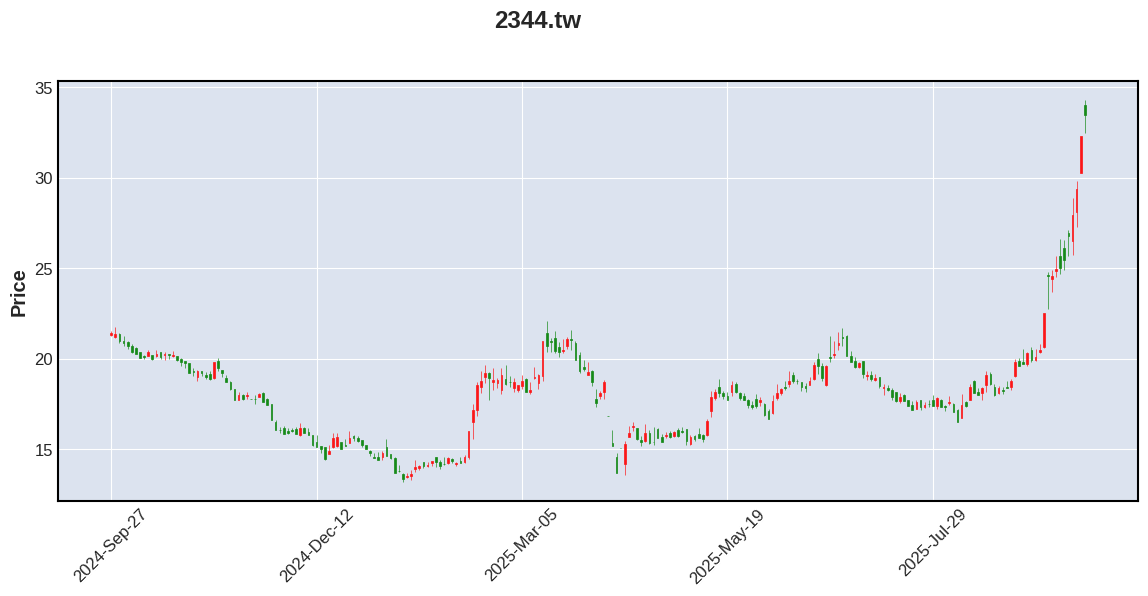

In [11]:
import mplfinance as mpf
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 ÊçïÊçâ Hammer ÂûãÊÖã

ÈåòÂΩ¢Á∑öÔºàHammerÔºâ

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [12]:
# ÂéüÊôÇÈñìÂçÄÈñìÊ≤íÊúâhammerÂúñÂΩ¢ÔºåÂª∂Èï∑ÊôÇÈñìÂçÄÈñìDemo
start_H = dt.datetime(2020, 1, 1)  # ÊåáÂÆöÁöÑÈñãÂßãÊó•Êúü
end_H = end    # ÊåáÂÆöÁöÑÁµêÊùüÊó•Êúü

# ÂèÉÊï∏1: ËÇ°Á•®‰ª£Ëôü, ÂèÉÊï∏2: ÈñãÂßãÊôÇÈñì, ÂèÉÊï∏3: ÁµêÊùüÊôÇÈñì
df_H = yf.download(stock_id, start=start_H, end=end_H).reset_index()

# Âà™Èô§ Ticker Ê¨Ñ‰Ωç‰∏¶Âèñ‰ª£
df_H.columns = df_H.columns.droplevel('Ticker')

# Ë®àÁÆó K Á∑öÈï∑Â∫¶ = abs(Êî∂Áõ§-ÈñãÁõ§)
df_H['body_length'] = abs(df_H['Close'] - df_H['Open'])

# Ë®àÁÆó‰∏ãÂΩ±Á∑öÈï∑Â∫¶ = abs(ÊúÄÈ´ò-ÊúÄÂ∞è)
df_H['lower_shadow'] = abs(df_H['Low'] - df_H[['Open', 'Close']].min(axis=1))

# Ë®àÁÆó‰∏äÂΩ±Á∑öÈï∑Â∫¶ = abs(ÊúÄÈ´ò-ÊúÄÂ∞è)
df_H['upper_shadow'] = abs(df_H['High'] - df_H[['Open', 'Close']].max(axis=1))

print('df_H',df_H)
# ÂÆöÁæ© Hammer ÂûãÊÖãÁöÑÊ¢ù‰ª∂
hammer_condition = (
    (df_H['lower_shadow'] > 2 * df_H['body_length']) &  # ‰∏ãÂΩ±Á∑öÈï∑ÊñºÂØ¶È´îÁöÑ‰∏§ÂÄç
    (df_H['upper_shadow'] < df_H['body_length'] * 0.1) &  # ‰∏äÂΩ±Á∑öÂæàÁü≠
    (df_H['body_length'] < (df_H['High'] - df_H['Low']) * 0.4)  # ÂØ¶È´îÁõ∏Â∞çËºÉÂ∞è
)

# ÊèêÂèñ Hammer ÂûãÊÖã
hammer_df = df_H[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

/tmp/ipython-input-3308432685.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_H = yf.download(stock_id, start=start_H, end=end_H).reset_index()
[*********************100%***********************]  1 of 1 completed

df_H Price       Date      Close       High        Low       Open     Volume  \
0     2020-01-02  17.861187  18.270221  17.861187  18.042980   59894947   
1     2020-01-03  18.088428  18.224774  17.724843  18.224774   58869257   
2     2020-01-06  17.679394  18.724705  17.588497  18.179325  147957153   
3     2020-01-07  17.315805  17.997530  17.088565  17.861186   45397796   
4     2020-01-08  17.361258  17.633946  17.315808  17.361258   29095750   
...          ...        ...        ...        ...        ...        ...   
1384  2025-09-15  26.799999  27.100000  25.700001  26.950001  467481131   
1385  2025-09-16  27.950001  28.900000  25.750000  26.500000  639359881   
1386  2025-09-17  29.400000  29.799999  27.299999  28.100000  442590512   
1387  2025-09-18  32.299999  32.299999  30.250000  30.250000  445214363   
1388  2025-09-19  33.500000  34.299999  32.500000  34.000000  580346156   

Price  body_length  lower_shadow  upper_shadow  
0         0.181793      0.000000      0.22724

Price           Close       High        Low       Open     Volume  \
Date                                                                
2020-01-03  18.088428  18.224774  17.724843  18.224774   58869257   
2020-03-26  10.589457  10.680352  10.089525  10.680352   30368169   
2020-06-23  12.361941  12.407390  12.180148  12.407390   15130802   
2021-03-19  25.821470  25.821470  25.134729  25.638341  102186679   
2021-04-15  31.223833  31.590095  30.491308  31.590095  135181421   
2022-02-14  29.559717  30.020149  28.546768  30.020149   82462755   
2022-04-21  26.244610  26.336696  25.784179  26.336696   38129423   
2022-08-18  21.369062  21.369062  21.034423  21.321256   10695632   
2022-11-29  20.317341  20.460757  19.982703  20.460757   14290552   
2022-12-23  19.217813  19.217813  18.883176  19.122202    9589525   
2023-04-26  23.663727  23.663727  23.233478  23.615922   22255935   
2023-05-10  23.185671  23.281284  22.707617  23.281284   20746704   
2023-11-13  25.500000  25.500000  25.100000  25.400000   13720669   
2024-01-29  27.900000  28.000000  27.600000  28.000000   14608830   
2024-08-13  23.600000  23.600000  23.250000  23.500000   12943801   
2024-10-22  20.200001  20.250000  20.000000  20.250000   18837596   

Price       body_length  lower_shadow  upper_shadow  
Date                                                 
2020-01-03     0.136346      0.363585           0.0  
2020-03-26     0.090896      0.499932           0.0  
2020-06-23     0.045448      0.181793           0.0  
2021-03-19     0.183129      0.503612           0.0  
2021-04-15     0.366262      0.732525           0.0  
2022-02-14     0.460432      1.012949           0.0  
2022-04-21     0.092086      0.460430           0.0  
2022-08-18     0.047806      0.286833           0.0  
2022-11-29     0.143416      0.334638           0.0  
2022-12-23     0.095611      0.239027           0.0  
2023-04-26     0.047805      0.382444           0.0  
2023-05-10     0.095613      0.478054           0.0  
2023-11-13     0.100000      0.299999           0.0  
2024-01-29     0.100000      0.299999           0.0  
2024-08-13     0.100000      0.250000           0.0  
2024-10-22     0.049999      0.200001           0.0

Hammer ÂûãÊÖãÊï∏ÈáèÔºö16


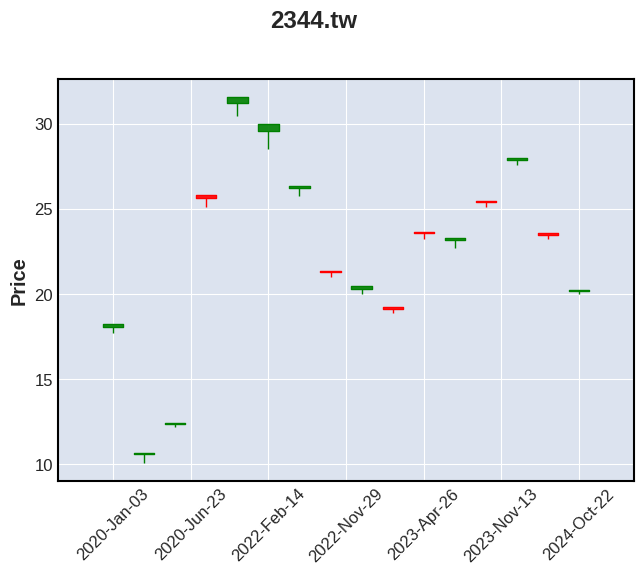

In [13]:
print(f"Hammer ÂûãÊÖãÊï∏ÈáèÔºö{len(hammer_df)}")
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 ÊçïÊçâ Doji ÂûãÊÖã

ÂçÅÂ≠óÁ∑öÔºàDojiÔºâ

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [14]:
# Ë®àÁÆó K Á∑öÈï∑Â∫¶
df['body_length'] = abs(df['Close'] - df['Open'])

# ÂÆöÁæ©DojiÂûãÊÖãÁöÑÊ¢ù‰ª∂
# ‰∏ÄËà¨‰æÜË™™Ôºåbody Èï∑Â∫¶ Â¶ÇÊûú Â∞èÊñºÁ≠âÊñº (ÊúÄÈ´òÂÉπ-ÊúÄ‰ΩéÂÉπ) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # ‰∏≠ÈñìÂçÄÂüüÈùûÂ∏∏Â∞è
)

# ÊèêÂèñDojiÂΩ¢ÊÄÅ
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price           Close       High        Low       Open     Volume     8_SMA  \
Date                                                                          
2024-11-20  17.799999  17.799999  17.799999  17.799999   24850865  18.19375   
2024-11-21  17.799999  18.000000  17.500000  17.799999   31582075  18.01875   
2024-11-29  16.049999  16.250000  15.900000  16.049999   24316297  17.17500   
2025-01-10  13.800000  14.150000  13.750000  13.800000   19494666  14.39375   
2025-02-05  14.200000  14.600000  14.150000  14.200000   24625125  14.15000   
2025-02-27  18.700001  19.049999  18.450001  18.700001   88088912  18.87500   
2025-03-10  19.000000  19.549999  18.900000  18.950001  189430138  18.59375   
2025-03-14  20.950001  21.150000  20.350000  21.000000  174762544  19.49375   
2025-03-19  20.500000  21.100000  20.299999  20.450001  124877303  20.25625   
2025-03-21  21.049999  21.600000  20.500000  21.100000  138059939  20.76250   
2025-04-07  16.850000  16.850000  16.850000  16.850000    4663752  18.49375   
2025-04-10  15.050000  15.050000  15.050000  15.050000   34646906  16.73125   
2025-04-15  16.299999  16.500000  16.000000  16.250000   42180347  15.87500   
2025-04-22  15.400000  16.250000  15.250000  15.400000  130022009  15.63750   
2025-06-12  18.799999  18.900000  18.600000  18.799999   28575325  18.20000   
2025-06-24  20.049999  21.250000  19.850000  20.100000  242728419  19.18125   
2025-06-25  20.250000  21.000000  20.049999  20.200001  147173426  19.40625   
2025-06-27  21.150000  21.700001  20.700001  21.200001  169476773  20.01250   
2025-07-11  18.450001  18.600000  18.000000  18.400000   41875225  19.04375   
2025-07-28  17.500000  17.750000  17.350000  17.500000   17650073  17.50000   
2025-09-08  24.600000  24.799999  22.750000  24.650000  435706691  20.91250   
2025-09-10  24.950001  25.700001  24.500000  24.850000  284634798  22.18750   

Price          13_SMA   20_SMA    40_SMA     60_SMA  ...      Gain      Loss  \
Date                                                 ...                       
2024-11-20  18.611539  18.9725       NaN        NaN  ...  0.000000  0.200001   
2024-11-21  18.503846  18.8525       NaN        NaN  ...  0.000000  0.000000   
2024-11-29  17.480769  18.0775  19.08750        NaN  ...  0.000000  0.000000   
2025-01-10  14.773077  14.8950  15.77250  16.992500  ...  0.100000  0.000000   
2025-02-05  13.942308  14.1950  14.83625  15.916667  ...  0.150000  0.000000   
2025-02-27  17.807693  16.5750  15.51000  15.570000  ...  0.100000  0.000000   
2025-03-10  18.746154  17.8600  16.00375  15.795833  ...  0.750000  0.000000   
2025-03-14  19.200000  18.9950  16.58875  16.093333  ...  0.250000  0.000000   
2025-03-19  19.576923  19.3375  17.07125  16.345833  ...  0.150000  0.000000   
2025-03-21  19.953846  19.5375  17.45250  16.557500  ...  0.000000  0.050001   
2025-04-07  19.300000  19.5175  18.47875  17.050833  ...  0.000000  1.850000   
2025-04-10  17.915385  18.8975  18.50000  17.045000  ...  1.350000  0.000000   
2025-04-15  16.926923  18.1400  18.56750  17.105833  ...  0.400000  0.000000   
2025-04-22  15.738461  16.8475  18.19250  17.250833  ...  0.049999  0.000000   
2025-06-12  17.876923  17.9250  16.91750  17.325000  ...  0.000000  0.000000   
2025-06-24  18.969231  18.4200  17.64375  17.179167  ...  0.449999  0.000000   
2025-06-25  19.115384  18.5650  17.75750  17.195833  ...  0.200001  0.000000   
2025-06-27  19.484615  18.9100  18.01500  17.291667  ...  0.299999  0.000000   
2025-07-11  19.584615  19.4800  18.71125  17.820000  ...  0.000000  0.049999   
2025-07-28  17.750000  18.3000  18.68625  18.180000  ...  0.049999  0.000000   
2025-09-08  20.065385  19.4750  18.48125  18.814167  ...  2.050001  0.000000   
2025-09-10  21.057692  20.1225  18.81500  19.020000  ...  0.400002  0.000000   

Price       Avg Gain  Avg Loss        RS        RSI      EMA_8     EMA_13  \
Date                                                                        
2024-11-20  0.107143  0.2107

In [15]:
doji_df.index

DatetimeIndex(['2024-11-20', '2024-11-21', '2024-11-29', '2025-01-10',
               '2025-02-05', '2025-02-27', '2025-03-10', '2025-03-14',
               '2025-03-19', '2025-03-21', '2025-04-07', '2025-04-10',
               '2025-04-15', '2025-04-22', '2025-06-12', '2025-06-24',
               '2025-06-25', '2025-06-27', '2025-07-11', '2025-07-28',
               '2025-09-08', '2025-09-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

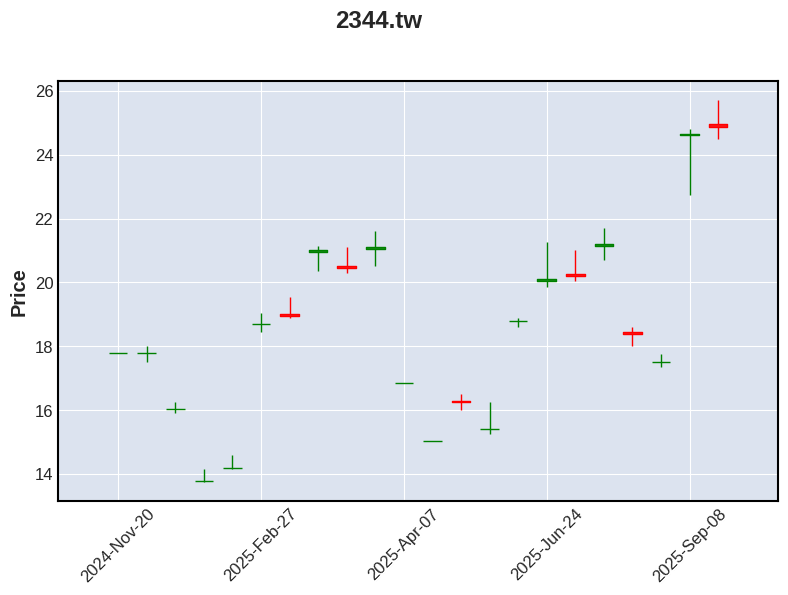

In [16]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. Ê©üÂô®Â≠∏ÁøíÈ†êÊ∏¨ËÇ°ÂÉπÊº≤Ë∑å</b>
ÊäÄË°ìÊåáÊ®ôÁï∂ÁâπÂæµÔºåÁî®Á∑öÊÄßÂõûÊ≠∏„ÄÅÊ±∫Á≠ñÊ®π„ÄÅÈö®Ê©üÊ£ÆÊûóÈ†êÊ∏¨ËÇ°ÂÉπÊº≤Ë∑å

## 3.1 Ë≥áÊñôÂâçËôïÁêÜ

In [17]:
import numpy as np  # ÂºïÂÖ• numpyÔºåÁî®ÊñºÊï∏ÊìöËôïÁêÜÂíåÊï∏ÂÄºÈÅãÁÆó
from sklearn.model_selection import train_test_split  # ÂºïÂÖ• train_test_splitÔºåÁî®ÊñºÂ∞áÊï∏ÊìöÈõÜÊãÜÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
from sklearn.metrics import mean_squared_error  # ÂºïÂÖ• mean_squared_error Áî®ÊñºË©ï‰º∞Ê®°ÂûãÊÄßËÉΩ

In [18]:
# Ê®ôÁ±§: È†êÊ∏¨Êú™‰æÜ1Â§©ÁöÑÂÉπÊ†ºÔºåËàâ‰æãË™™Êòé:Áî®ÊäÄË°ìÊåáÊ®ôÈ†êÊ∏¨ÈöîÂ§©ÁöÑÊî∂Áõ§ÂÉπ
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# ÂéªÈô§Áº∫Â§±ÂÄº
df.dropna(inplace=True)

# # ‰ΩøÁî®ÁâπÂæµ
X = df[['20_SMA', 'RSI', 'MACD']] #‰∏çË∑ëlinear
# ÁâπÂæµËàáÊ®ôÁ±§ linearÊ∏¨Ë©¶
X_20 = df[['20_SMA', 'RSI', 'MACD']]
X_8 = df[['8_SMA', 'RSI', 'MACD']]
X_60 = df[['60_SMA', 'RSI', 'MACD']]

# Ê®ôÁ±§ÔºàÊú™‰æÜÂÉπÊ†ºÔºâ
y = df['Future_Price']

X.shape, y.shape

((178, 3), (178,))

In [19]:
# # Â∞áÊï∏ÊìöÈõÜ X ÂíåÊ®ôÁ±§ y ÊãÜÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
# test_size=0.2 Ë°®Á§∫Ê∏¨Ë©¶ÈõÜ‰ΩîÂÖ®ÈÉ®Êï∏ÊìöÁöÑ 20% --> 80% ÁöÑË≥áÊñô‰ΩúÁÇ∫Ë®ìÁ∑¥Ôºå20% ÁöÑË≥áÊñô‰ΩúÁÇ∫Ê∏¨Ë©¶
# shuffle=False Ë°®Á§∫Âú®ÊãÜÂàÜÊï∏ÊìöÊôÇ‰∏çÊâì‰∫ÇÂéüÂßãÊï∏ÊìöÁöÑÈ†ÜÂ∫è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #‰∏çË∑ëlinear

# ÊãÜÂàÜË®ìÁ∑¥ËàáÊ∏¨Ë©¶ÈõÜÔºà‰øùÊåÅ‰∏ÄËá¥Ôºâ
X_train_20, X_test_20, y_train, y_test = train_test_split(X_20, y, test_size=0.2, shuffle=False)
X_train_8, X_test_8, _, _ = train_test_split(X_8, y, test_size=0.2, shuffle=False)
X_train_60, X_test_60, _, _ = train_test_split(X_60, y, test_size=0.2, shuffle=False)


# Êü•ÁúãÊãÜÂàÜÂæåË®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÂΩ¢ÁãÄ
X_train_20.shape, X_test_20.shape, y_train.shape, y_test.shape
X_train_8.shape, X_test_8.shape, y_train.shape, y_test.shape
X_train_60.shape, X_test_60.shape, y_train.shape, y_test.shape



((142, 3), (36, 3), (142,), (36,))

## 3.2 Á∑öÊÄßÂõûÊ≠∏ÔºàLinear RegressionÔºâ

In [20]:
# ÂºïÂÖ•Á∑öÊÄßÂõûÊ≠∏Ê®°Âûã
from sklearn.linear_model import LinearRegression

# # Âª∫Á´ã‰∏¶Ë®ìÁ∑¥Á∑öÊÄßÂõûÊ≠∏Ê®°Âûã
# model = LinearRegression()
# model.fit(X_train, y_train)

# # È†êÊ∏¨
# y_pred = model.predict(X_test)
# Ê®°Âûã1Ôºö‰ΩøÁî® 20_SMA
model_20 = LinearRegression()
model_20.fit(X_train_20, y_train)
y_pred_20 = model_20.predict(X_test_20)

# Ê®°Âûã2Ôºö‰ΩøÁî® 8_SMA
model_8 = LinearRegression()
model_8.fit(X_train_8, y_train)
y_pred_8 = model_8.predict(X_test_8)

# Ê®°Âûã3Ôºö‰ΩøÁî® 60_SMA
model_60 = LinearRegression()
model_60.fit(X_train_60, y_train)
y_pred_60 = model_60.predict(X_test_60)

# # Ë©ï‰º∞
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(f"Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãRMSE: {rmse:.2f}")
rmse_20 = np.sqrt(mean_squared_error(y_test, y_pred_20))
rmse_8 = np.sqrt(mean_squared_error(y_test, y_pred_8))
rmse_60 = np.sqrt(mean_squared_error(y_test, y_pred_60))
print(f"RMSE (20_SMA): {rmse_20:.2f}")
print(f"RMSE (8_SMA): {rmse_8:.2f}")
print(f"RMSE (60_SMA): {rmse_60:.2f}")

# ‰ΩøÁî®Ê®°ÂûãÈÄ≤Ë°åÊú™‰æÜÂÉπÊ†ºËµ∞Âã¢È†êÊ∏¨
future_pred = model_20.predict(X_20[-1:])  # ‰ΩøÁî®ÊúÄÊñ∞ÁöÑÊï∏ÊìöÈÄ≤Ë°åÈ†êÊ∏¨
print(f"Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ{n}Â§©ÁöÑÂÉπÊ†º(20_SMA): {future_pred[0]:.2f}")
future_pred = model_8.predict(X_8[-1:])  # ‰ΩøÁî®ÊúÄÊñ∞ÁöÑÊï∏ÊìöÈÄ≤Ë°åÈ†êÊ∏¨
print(f"Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ{n}Â§©ÁöÑÂÉπÊ†º(8_SMA): {future_pred[0]:.2f}")
future_pred = model_60.predict(X_60[-1:])  # ‰ΩøÁî®ÊúÄÊñ∞ÁöÑÊï∏ÊìöÈÄ≤Ë°åÈ†êÊ∏¨
print(f"Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ{n}Â§©ÁöÑÂÉπÊ†º(60_SMA): {future_pred[0]:.2f}")

RMSE (20_SMA): 1.90
RMSE (8_SMA): 2.07
RMSE (60_SMA): 1.96
Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ1Â§©ÁöÑÂÉπÊ†º(20_SMA): 28.29
Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ1Â§©ÁöÑÂÉπÊ†º(8_SMA): 27.79
Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ1Â§©ÁöÑÂÉπÊ†º(60_SMA): 27.99


#ÊØîËºÉ‰∏çÂêåSMAÂ•óÁî®Âà∞Ê®°ÂûãÁöÑÂ∑ÆÁï∞

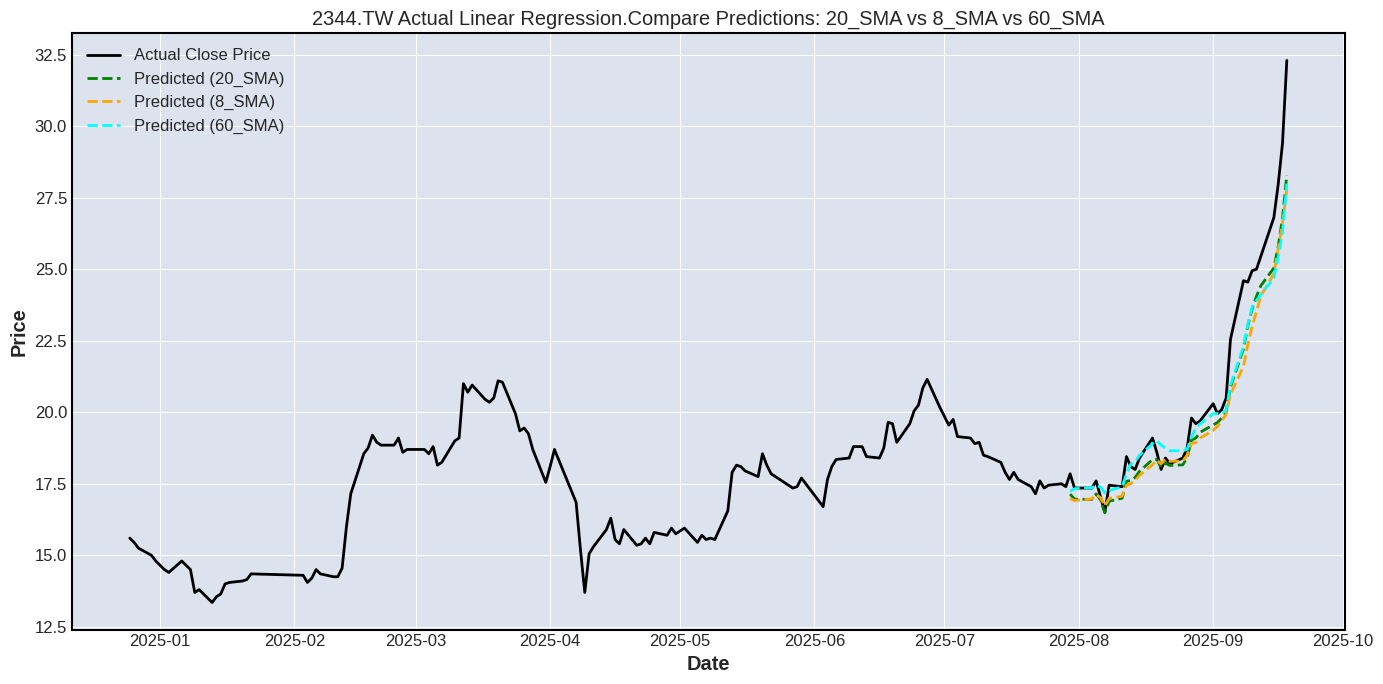

In [21]:
# # Áï´Âá∫Ê∏¨Ë©¶ÈõÜÁöÑÂØ¶ÈöõÂÉπÊ†ºËàáÈ†êÊ∏¨ÂÉπÊ†ºËµ∞Âã¢Âúñ
# plt.figure(figsize=(14, 7))
# plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
# plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('2344.TW Actual vs Predicted Prices on Test Set')
# # plt.title('2230.TW Actual vs Predicted Prices on Test Set')#
# plt.legend()
# plt.grid(True)
# plt.show()
# üé® Áï´ÂúñÊØîËºÉÈ†êÊ∏¨Â∑ÆÁï∞
plt.figure(figsize=(14, 7))

# ÂØ¶ÈöõÊî∂Áõ§ÂÉπ
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='black', linewidth=2)

# È†êÊ∏¨Á∑ö1Ôºà20_SMA ÁÇ∫Âü∫Á§éÔºâ
plt.plot(df['Date'][-len(y_test):], y_pred_20, label='Predicted (20_SMA)', linestyle='--', color='green')

# È†êÊ∏¨Á∑ö2Ôºà8_SMA ÁÇ∫Âü∫Á§éÔºâ
plt.plot(df['Date'][-len(y_test):], y_pred_8, label='Predicted (8_SMA)', linestyle='--', color='orange')

plt.plot(df['Date'][-len(y_test):], y_pred_60, label='Predicted (60_SMA)', linestyle='--', color='cyan')

# ÂúñË°®Ë®≠ÂÆö
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW Actual Linear Regression.Compare Predictions: 20_SMA vs 8_SMA vs 60_SMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2 Ê±∫Á≠ñÊ®πÔºàDecision TreeÔºâ

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Âª∫Á´ã‰∏¶Ë®ìÁ∑¥Ê±∫Á≠ñÊï∏Ê®°Âûã
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# È†êÊ∏¨
y_pred = model.predict(X_test)

# Ë©ï‰º∞
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Ê±∫Á≠ñÊ®πÊ®°ÂûãRMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"Ê±∫Á≠ñÊ®πÊ®°ÂûãÈ†êÊ∏¨Êú™‰æÜ{n}Â§©ÁöÑÂÉπÊ†º: {future_pred[0]:.2f}")

Ê±∫Á≠ñÊ®πÊ®°ÂûãRMSE: 4.30
Ê±∫Á≠ñÊ®πÊ®°ÂûãÈ†êÊ∏¨Êú™‰æÜ1Â§©ÁöÑÂÉπÊ†º: 19.95


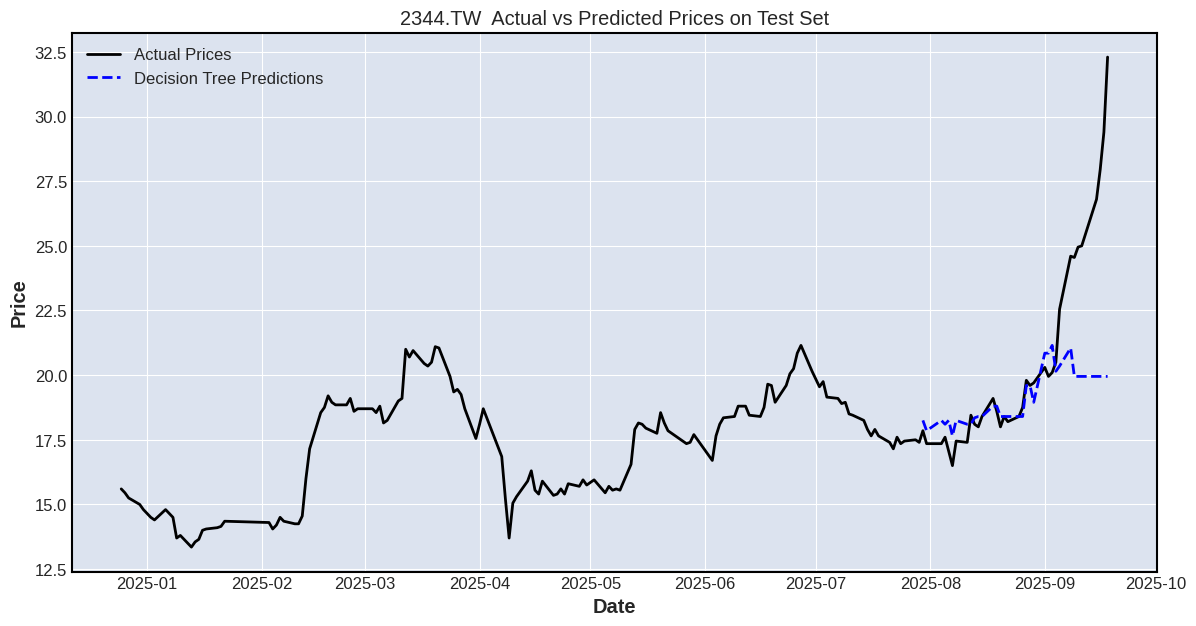

In [23]:
# Áï´Âá∫Ê∏¨Ë©¶ÈõÜÁöÑÂØ¶ÈöõÂÉπÊ†ºËàáÈ†êÊ∏¨ÂÉπÊ†ºËµ∞Âã¢Âúñ
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW  Actual vs Predicted Prices on Test Set')
# plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 Èö®Ê©üÊ£ÆÊûóÔºàRandom ForestÔºâ

In [24]:
# ÂºïÂÖ•Èö®Ê©üÊ£ÆÊûóÊ®°Âûã
from sklearn.ensemble import RandomForestRegressor

# Âª∫Á´ã‰∏¶Ë®ìÁ∑¥Ê±∫Á≠ñÊï∏Ê®°Âûã
model = RandomForestRegressor()
model.fit(X_train, y_train)

# È†êÊ∏¨
y_pred = model.predict(X_test)

# Ë©ï‰º∞
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Èö®Ê©üÊ£ÆÊûóÊ®°ÂûãRMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"Èö®Ê©üÊ£ÆÊûóÊ®°ÂûãÈ†êÊ∏¨Êú™‰æÜ{n}Â§©ÁöÑÂÉπÊ†º: {future_pred[0]:.2f}")

Èö®Ê©üÊ£ÆÊûóÊ®°ÂûãRMSE: 4.18
Èö®Ê©üÊ£ÆÊûóÊ®°ÂûãÈ†êÊ∏¨Êú™‰æÜ1Â§©ÁöÑÂÉπÊ†º: 20.22


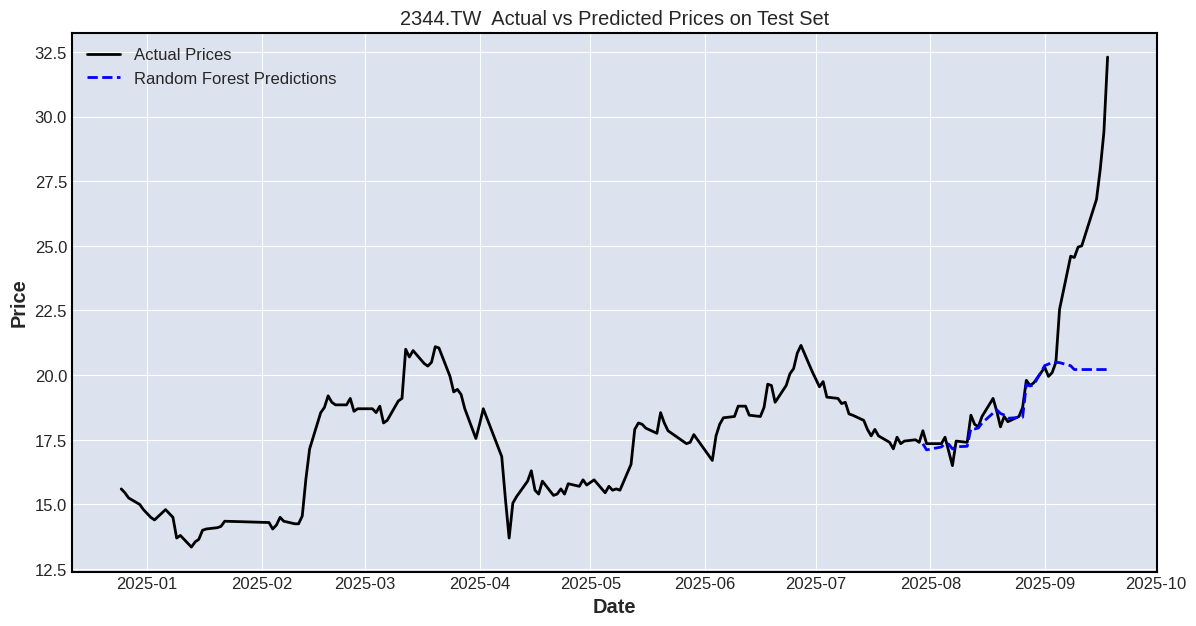

In [25]:
# Áï´Âá∫Ê∏¨Ë©¶ÈõÜÁöÑÂØ¶ÈöõÂÉπÊ†ºËàáÈ†êÊ∏¨ÂÉπÊ†ºËµ∞Âã¢Âúñ
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW  Actual vs Predicted Prices on Test Set')
# plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

#Ê®°ÂûãÊ∏¨Ë©¶-XGBoost

üìà XGBoost Ê®°Âûã RMSE: 3.61
üß† XGBoost Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ 1 Â§©ÁöÑÂÉπÊ†º: 20.05


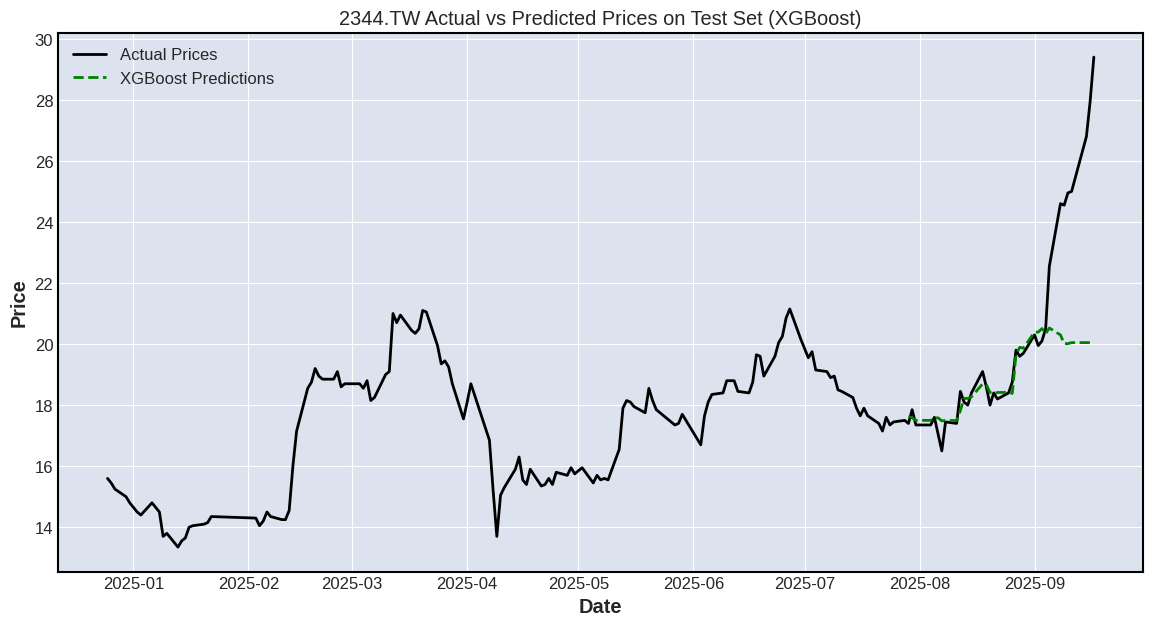

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# ÂÅáË®≠ df Â∑≤ÂåÖÂê´ÊäÄË°ìÊåáÊ®ôËàá 'Date' Ê¨Ñ‰Ωç
n = 1
df['Future_Price'] = df['Close'].shift(-n)
df.dropna(inplace=True)

# ÁâπÂæµËàáÊ®ôÁ±§
X = df[['20_SMA', 'RSI', 'MACD']]
y = df['Future_Price']

# Ë≥áÊñôÊãÜÂàÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Âª∫Á´ã XGBoost Ê®°Âûã
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # ÂõûÊ≠∏‰ªªÂãôÂ∏∏Áî®
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Ë®ìÁ∑¥Ê®°Âûã
model.fit(X_train, y_train)

# È†êÊ∏¨
y_pred = model.predict(X_test)

# Ë©ï‰º∞Ê®°Âûã
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"üìà XGBoost Ê®°Âûã RMSE: {rmse:.2f}")

# È†êÊ∏¨Êú™‰æÜÂÉπÊ†ºÔºà‰ΩøÁî®ÊúÄÊñ∞‰∏ÄÁ≠ÜÁâπÂæµÔºâ
future_pred = model.predict(X[-1:])
print(f"üß† XGBoost Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ {n} Â§©ÁöÑÂÉπÊ†º: {future_pred[0]:.2f}")

# Áï´ÂúñÊØîËºÉÂØ¶ÈöõËàáÈ†êÊ∏¨ÂÉπÊ†º
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='XGBoost Predictions', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW Actual vs Predicted Prices on Test Set (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


#Ê®°ÂûãÊ∏¨Ë©¶-LightGBM

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 3
[LightGBM] [Info] Start training from score 17.312500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

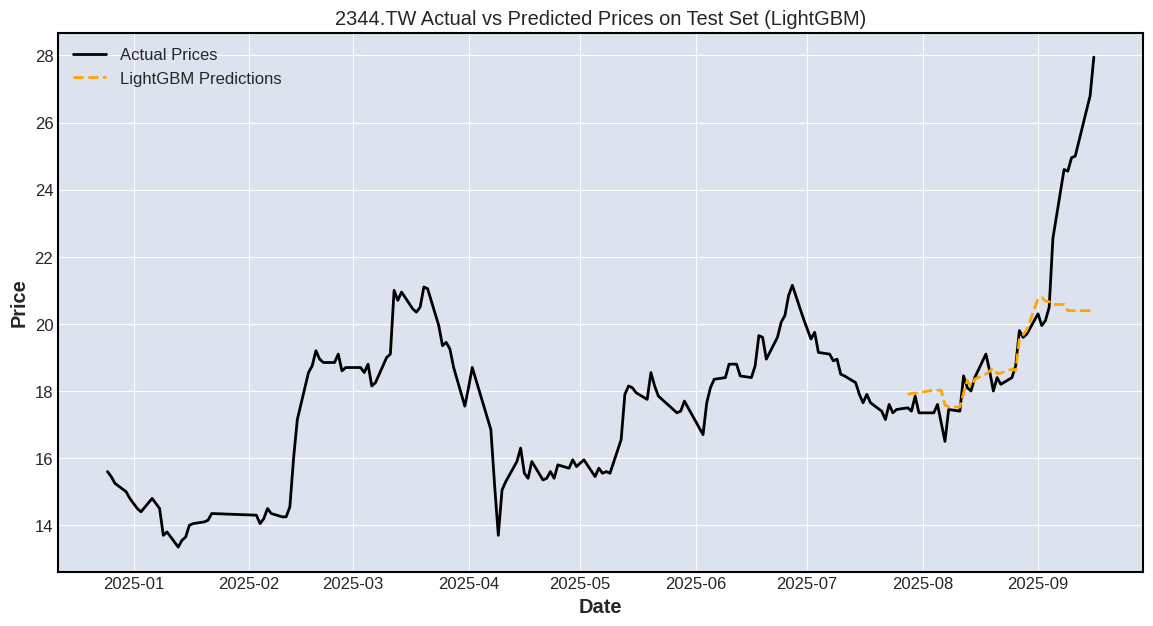

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Êú™‰æÜ 1 Â§©ÁöÑÊî∂Áõ§ÂÉπ‰ΩúÁÇ∫Ê®ôÁ±§
n = 1
df['Future_Price'] = df['Close'].shift(-n)
df.dropna(inplace=True)

# ÁâπÂæµËàáÊ®ôÁ±§
X = df[['20_SMA', 'RSI', 'MACD']]
y = df['Future_Price']

# ÊãÜÂàÜË®ìÁ∑¥ / Ê∏¨Ë©¶ÈõÜÔºà‰∏çÊâì‰∫ÇÈ†ÜÂ∫èÔºâ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Âª∫Á´ã LightGBM Ê®°Âûã
# model = lgb.LGBMRegressor(
#     objective='regression',
#     num_leaves=31,
#     learning_rate=0.05,
#     n_estimators=100,
#     random_state=42
# )
model = lgb.LGBMRegressor(
    num_leaves=7,        # Êõ¥Â∞èÁöÑËëâÁØÄÈªûÊï∏
    min_data_in_leaf=10, # Èôç‰ΩéÂàÜË£ÇÈñÄÊ™ª
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)
# Ë®ìÁ∑¥Ê®°Âûã
model.fit(X_train, y_train)

# È†êÊ∏¨
y_pred = model.predict(X_test)

# Ë©ï‰º∞Ê®°Âûã
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"üìà LightGBM Ê®°Âûã RMSE: {rmse:.2f}")

# È†êÊ∏¨ÊúÄÊñ∞‰∏ÄÂ§©Êú™‰æÜÂÉπÊ†º
future_pred = model.predict(X[-1:])
print(f"üß† LightGBM È†êÊ∏¨Êú™‰æÜ {n} Â§©ÁöÑÂÉπÊ†º: {future_pred[0]:.2f}")

# Áï´ÂúñÊØîËºÉÂØ¶ÈöõËàáÈ†êÊ∏¨ÂÉπÊ†º
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='LightGBM Predictions', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW Actual vs Predicted Prices on Test Set (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()
